In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train_values.csv')
train_values = pd.read_csv('train_labels.csv')
test_df = pd.read_csv('test_values.csv')

### Feature Info
There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.

slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

resting_blood_pressure (type: int): resting blood pressure

chest_pain_type (type: int): chest pain type (4 values)

num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy

fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl

resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)

serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl

oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

sex (type: binary): 0: female, 1: male

age (type: int): age in years

max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)

exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


In [4]:
train_values

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
5,ldukkw,0
6,2gbyh9,1
7,daa9kp,1
8,3nwy2n,1
9,1r508r,0


In [5]:
train_df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [6]:
train_df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


In [8]:
train_df.slope_of_peak_exercise_st_segment.value_counts(dropna=False)

1    93
2    75
3    12
Name: slope_of_peak_exercise_st_segment, dtype: int64

In [9]:
train_df.resting_blood_pressure.value_counts(dropna=False)

130    26
140    22
120    21
110    11
150    10
160     9
112     8
128     8
125     7
108     5
124     5
135     4
118     4
145     4
132     3
180     3
138     3
134     2
178     2
126     2
142     2
100     2
152     2
136     2
115     2
172     1
102     1
105     1
106     1
117     1
170     1
156     1
155     1
122     1
144     1
94      1
Name: resting_blood_pressure, dtype: int64

In [10]:
train_df.chest_pain_type.value_counts(dropna=False)

4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64

In [11]:
train_df.num_major_vessels.value_counts(dropna=False)

0    106
1     37
2     23
3     14
Name: num_major_vessels, dtype: int64

In [12]:
train_df.fasting_blood_sugar_gt_120_mg_per_dl.value_counts(dropna=False)

0    151
1     29
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: int64

In [13]:
train_df.max_heart_rate_achieved.value_counts(dropna=False)

162    10
132     6
142     6
150     5
170     5
172     5
173     5
152     5
125     5
165     4
145     4
122     4
158     4
147     4
151     4
154     3
155     3
131     3
160     3
163     3
179     3
130     3
168     3
144     3
140     3
111     3
175     3
126     3
169     3
138     2
       ..
181     2
182     2
103     2
161     2
115     1
202     1
113     1
112     1
120     1
108     1
106     1
105     1
99      1
97      1
117     1
149     1
121     1
123     1
133     1
134     1
137     1
141     1
192     1
167     1
177     1
180     1
184     1
186     1
188     1
96      1
Name: max_heart_rate_achieved, Length: 73, dtype: int64

In [14]:
train_df.resting_ekg_results.value_counts(dropna=False)

2    94
0    85
1     1
Name: resting_ekg_results, dtype: int64

In [15]:
train_df.serum_cholesterol_mg_per_dl.value_counts(dropna=False)

204    4
239    4
219    3
254    3
309    3
226    3
303    3
211    3
282    3
233    3
234    3
256    3
263    3
277    2
265    2
203    2
199    2
197    2
188    2
177    2
258    2
149    2
330    2
308    2
283    2
266    2
304    2
267    2
302    2
299    2
      ..
215    1
218    1
200    1
201    1
213    1
205    1
206    1
207    1
209    1
180    1
175    1
321    1
126    1
322    1
325    1
326    1
327    1
335    1
353    1
360    1
141    1
174    1
222    1
160    1
417    1
164    1
167    1
168    1
220    1
172    1
Name: serum_cholesterol_mg_per_dl, Length: 118, dtype: int64

In [16]:
train_df.oldpeak_eq_st_depression.value_counts(dropna=False)

0.0    56
1.4    11
1.6    10
1.2     9
1.0     7
0.2     7
0.6     7
0.4     7
0.8     7
1.8     6
2.0     5
0.1     5
0.5     4
2.2     4
2.4     3
1.5     3
1.9     3
2.6     3
2.8     2
3.0     2
2.3     2
0.9     2
4.2     2
0.3     2
3.4     2
1.1     1
2.5     1
1.3     1
3.8     1
3.2     1
5.6     1
3.1     1
0.7     1
6.2     1
Name: oldpeak_eq_st_depression, dtype: int64

In [17]:
train_df.exercise_induced_angina.value_counts(dropna=False)

0    123
1     57
Name: exercise_induced_angina, dtype: int64

In [18]:
train_df.thal.value_counts(dropna=False)

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [19]:
train_df.sex.value_counts(dropna=False)

1    124
0     56
Name: sex, dtype: int64

In [20]:
train_df.age.value_counts(dropna=False)

54    12
58    10
64     9
51     9
44     9
57     8
60     7
62     7
59     6
55     6
65     6
48     6
67     6
41     6
52     5
45     5
63     5
49     4
42     4
50     4
53     4
56     4
66     4
61     3
46     3
68     3
70     3
71     3
40     3
47     2
69     2
43     2
39     2
35     2
34     1
37     1
77     1
38     1
74     1
29     1
Name: age, dtype: int64

In [21]:
train_df = pd.concat([train_df,train_values.reset_index(drop=True)],axis=1)

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
patient_id                              180 non-null object
heart

# EDA

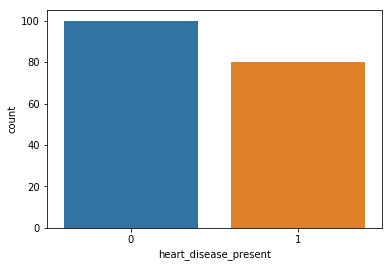

In [23]:
sns.countplot(train_df.heart_disease_present)

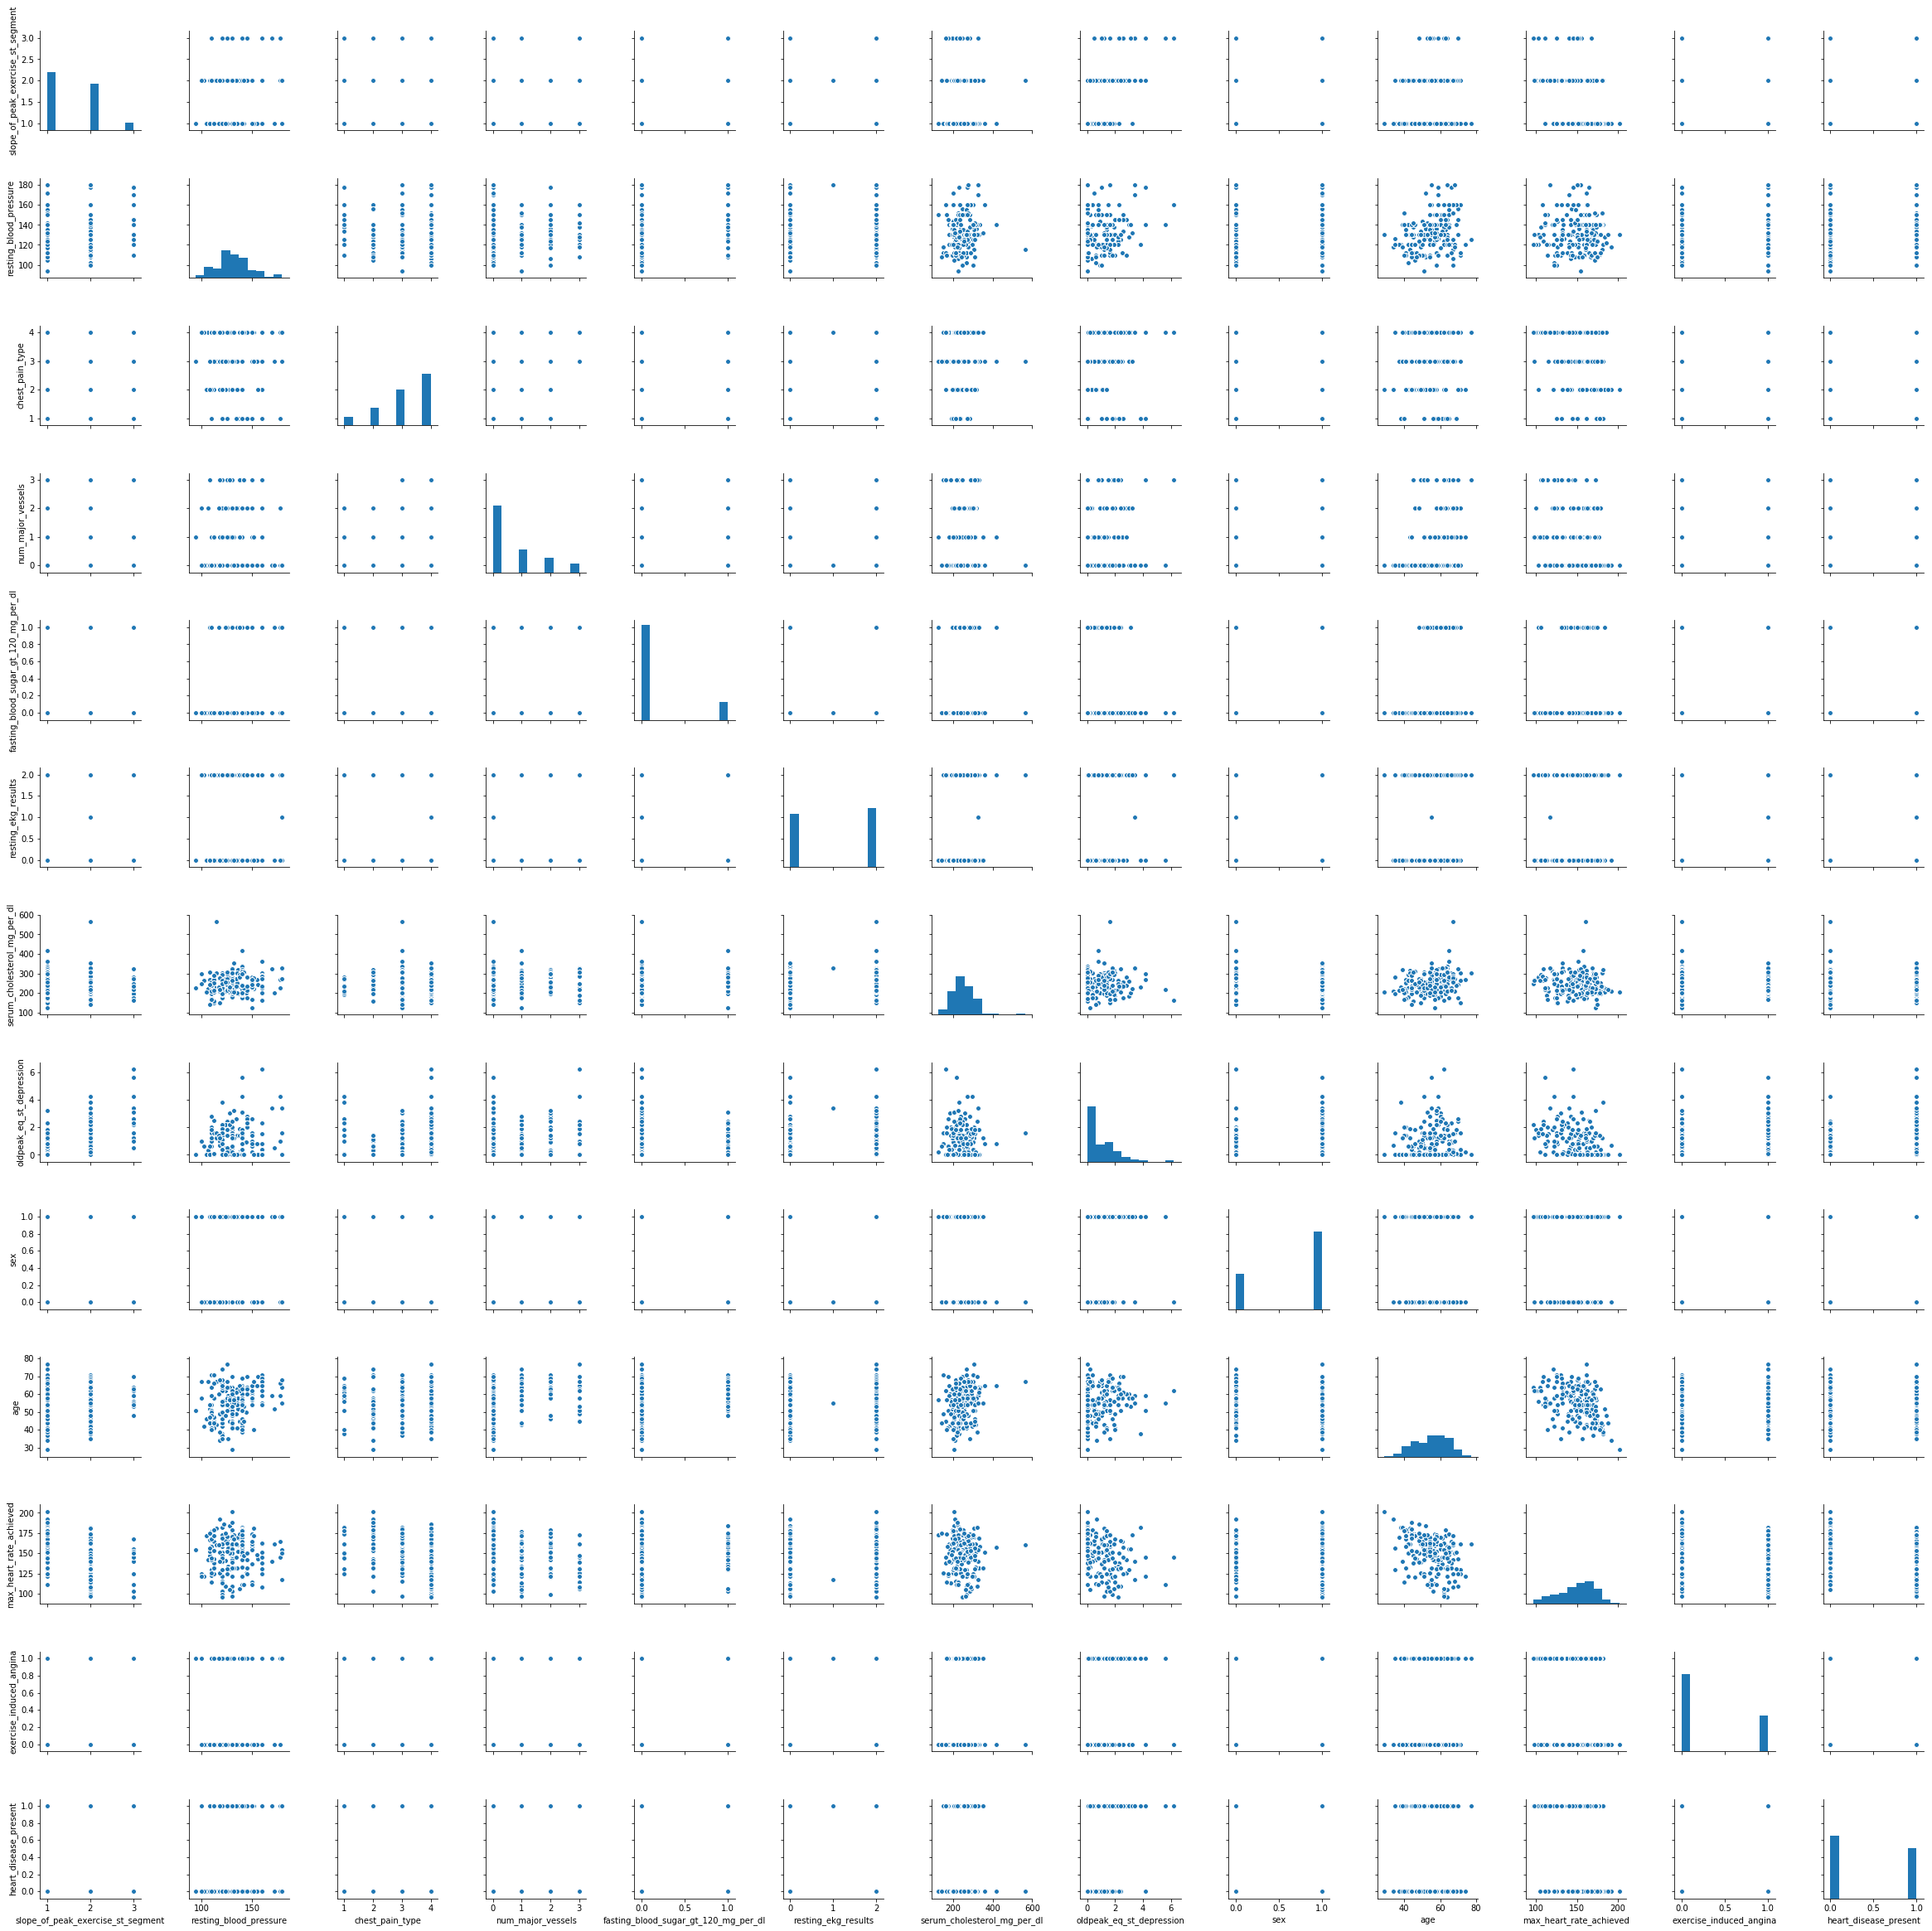

In [24]:
sns.pairplot(train_df)

## Chest pain type

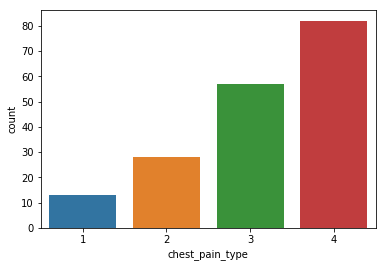

In [25]:
sns.countplot(train_df.chest_pain_type)

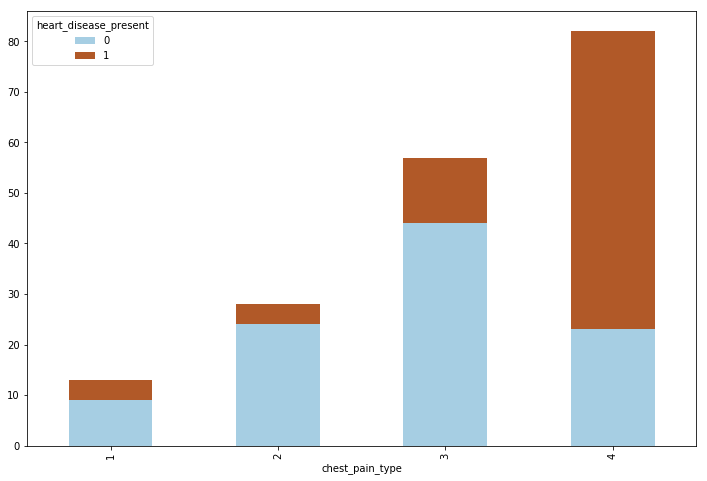

In [26]:
crosstab = pd.crosstab(index=train_df.chest_pain_type, columns=train_df.heart_disease_present)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

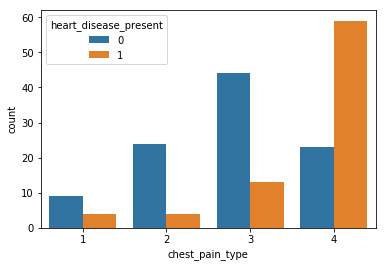

In [27]:
sns.countplot(train_df.chest_pain_type,hue=train_df.heart_disease_present)

#### Note:
1. Chest pain Type from 1-4 stand for increasing amount of pain.
2. The patients with chest pain type 4 are more likly to have heart disease

## slope_of_peak_exercise_st_segment

In [28]:
train_df['heart_disease_absent'] = 1 - train_df['heart_disease_present'] 

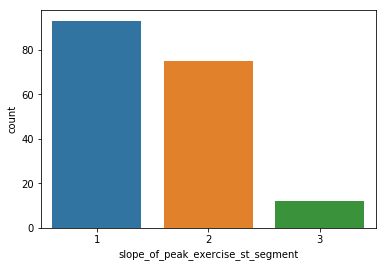

In [29]:
sns.countplot(train_df.slope_of_peak_exercise_st_segment)

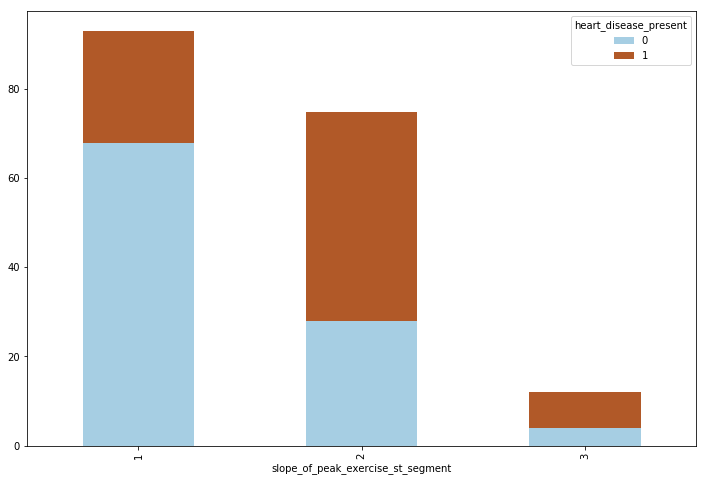

In [30]:
crosstab = pd.crosstab(index=train_df.slope_of_peak_exercise_st_segment, columns=train_df.heart_disease_present)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

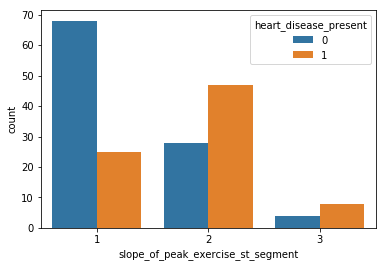

In [31]:
sns.countplot(train_df.slope_of_peak_exercise_st_segment,hue=train_df.heart_disease_present)

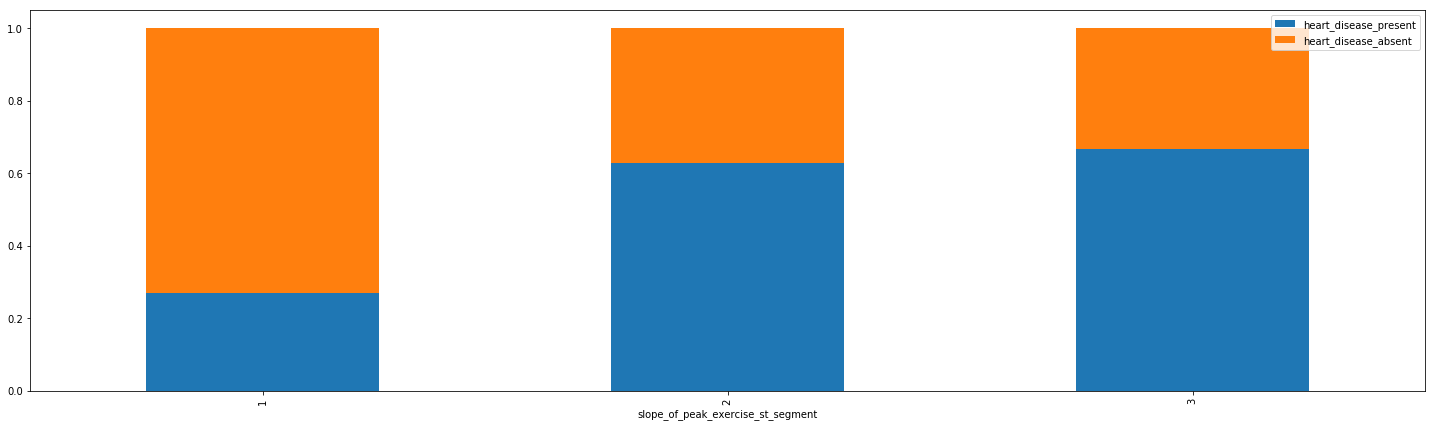

In [32]:
train_df.groupby('slope_of_peak_exercise_st_segment').agg('mean')[['heart_disease_present','heart_disease_absent']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);

#### Note:
1. Slope of peak exercise st segment indicates the blood flow to the heart. The higher the value the greater is the reduction in the flow of blood to the heart.
2. The presence of heart disease is more for patients having slope of peak exercise st segment 2 and 3 and this is no surprise as the blood flow to the heart reduces there will be a signs of heart disease.

## num_major_vessels

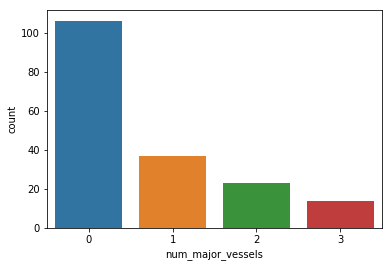

In [33]:
sns.countplot(train_df.num_major_vessels)

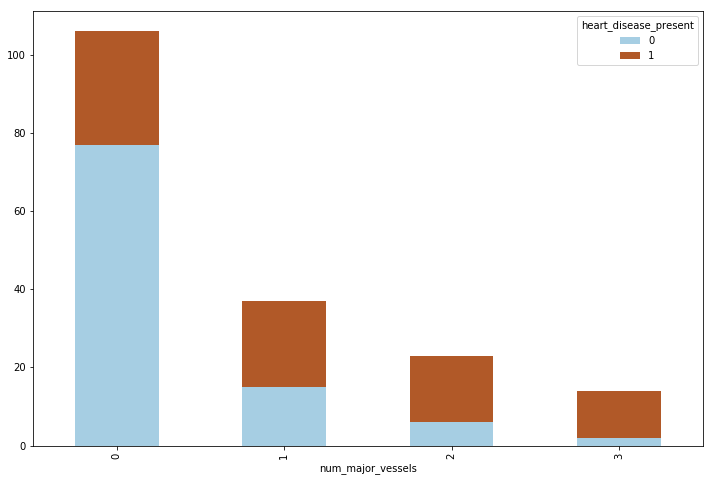

In [34]:
crosstab = pd.crosstab(index=train_df.num_major_vessels, columns=train_df.heart_disease_present)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

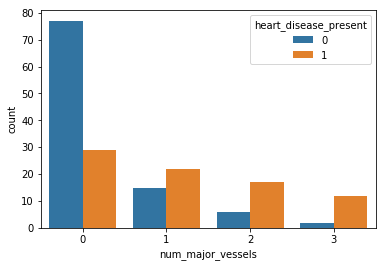

In [35]:
sns.countplot(train_df.num_major_vessels,hue=train_df.heart_disease_present)

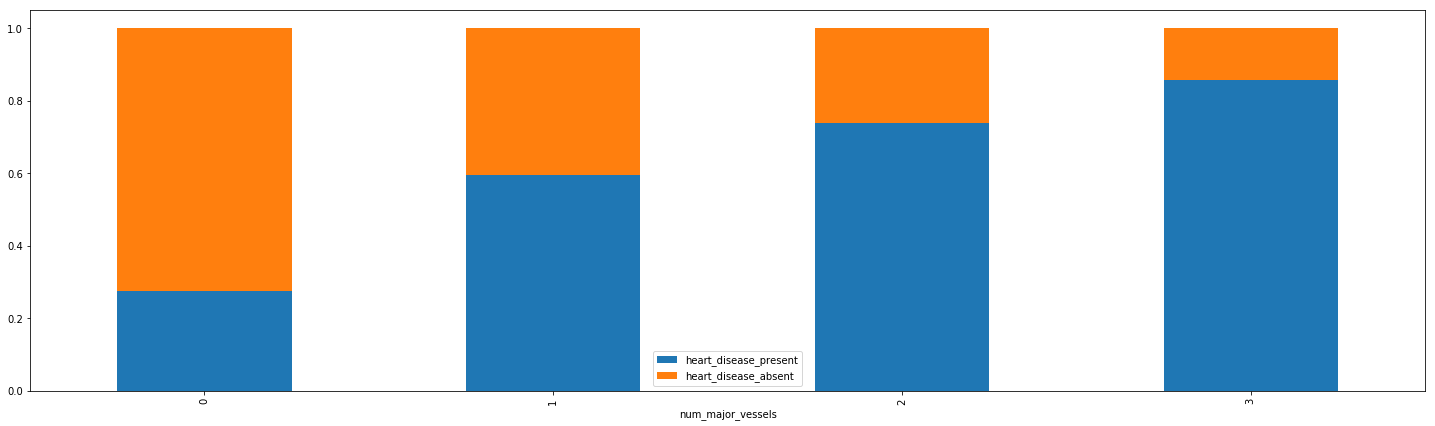

In [36]:
train_df.groupby('num_major_vessels').agg('mean')[['heart_disease_present','heart_disease_absent']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);

#### Note:
1. Num of Major Vessels coloured by flouroscopy would indicate the number of blocked vessels.
2. Clearly seen in the graphs as the number of blood vessels blocked increases, the presence of heart disease increases.

## fasting_blood_sugar_gt_120_mg_per_dl

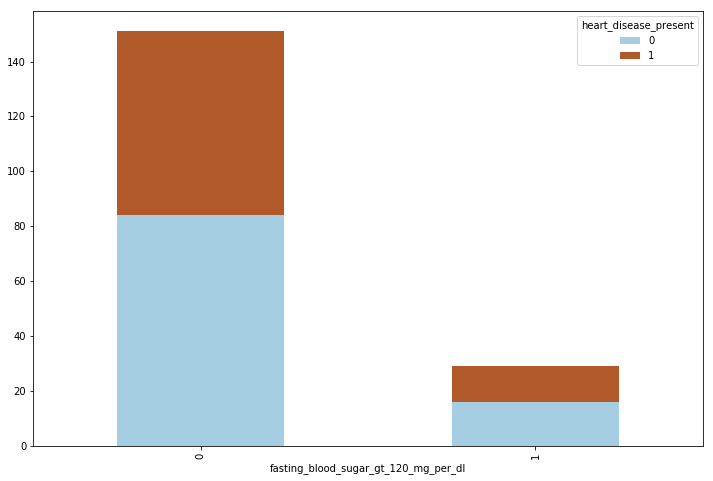

In [37]:
crosstab = pd.crosstab(index=train_df.fasting_blood_sugar_gt_120_mg_per_dl, columns=train_df.heart_disease_present)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

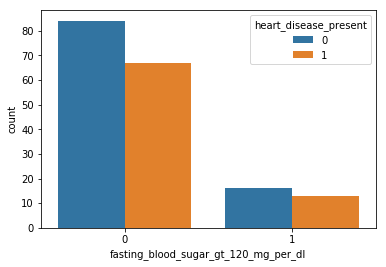

In [38]:
sns.countplot(train_df.fasting_blood_sugar_gt_120_mg_per_dl,hue=train_df.heart_disease_present)

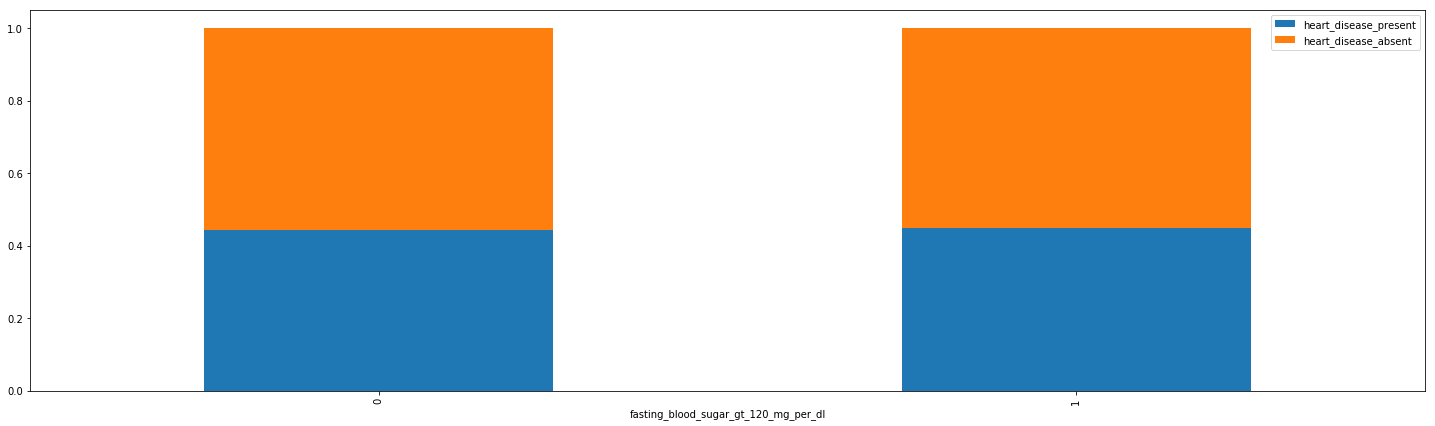

In [39]:
train_df.groupby('fasting_blood_sugar_gt_120_mg_per_dl').agg('mean')[['heart_disease_present','heart_disease_absent']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);

#### Note:
1. The fasting blood sugar gt 120 mg per dl appears to not have an effect on the presence of heart disease in a patient.

## resting_ekg_results

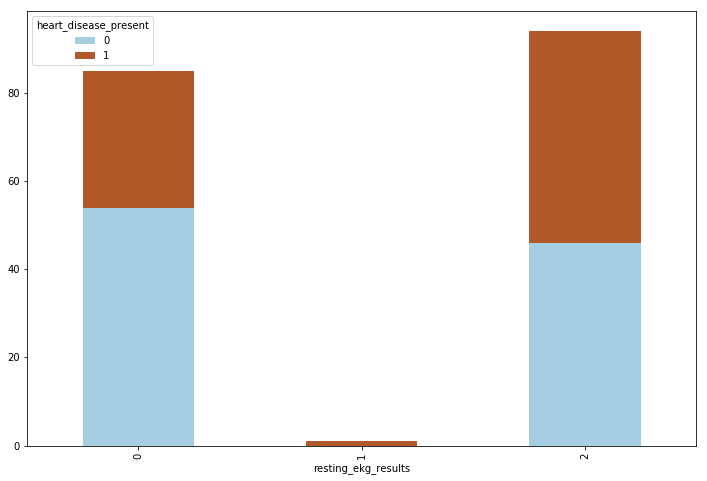

In [40]:
crosstab = pd.crosstab(index=train_df.resting_ekg_results, columns=train_df.heart_disease_present)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

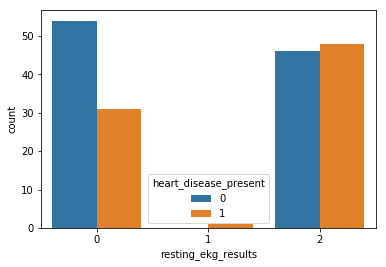

In [41]:
sns.countplot(train_df.resting_ekg_results,hue=train_df.heart_disease_present)

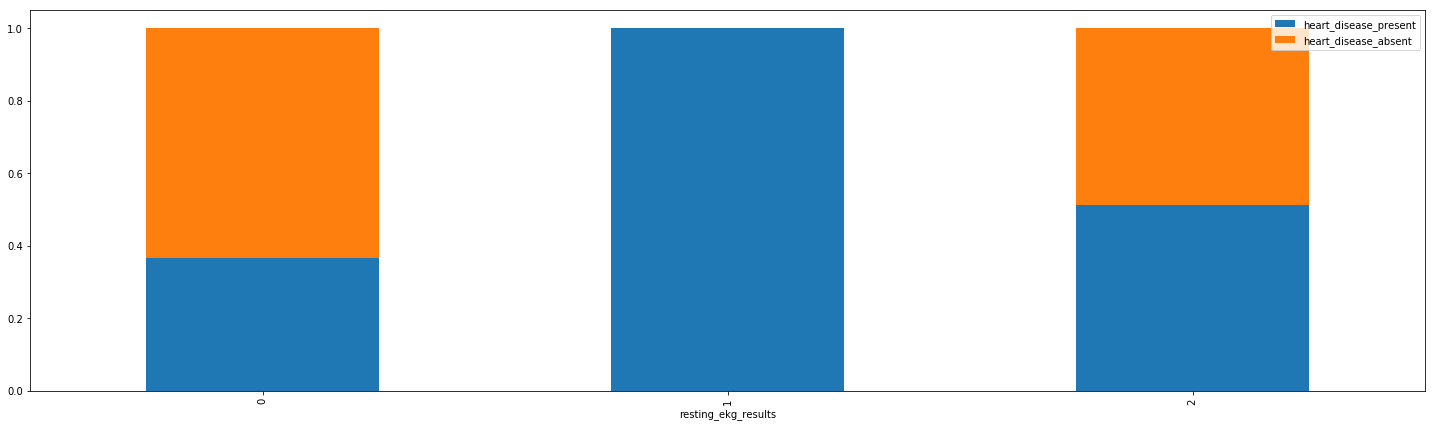

In [42]:
train_df.groupby('resting_ekg_results').agg('mean')[['heart_disease_present','heart_disease_absent']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);

#### Note:
1. The resting electrocardiographic results graphs reveals an interesting insight that all patients with resting_ekg_results = 1 have heart disease while values of 2 has only a 50% chance. 

## exercise_induced_angina

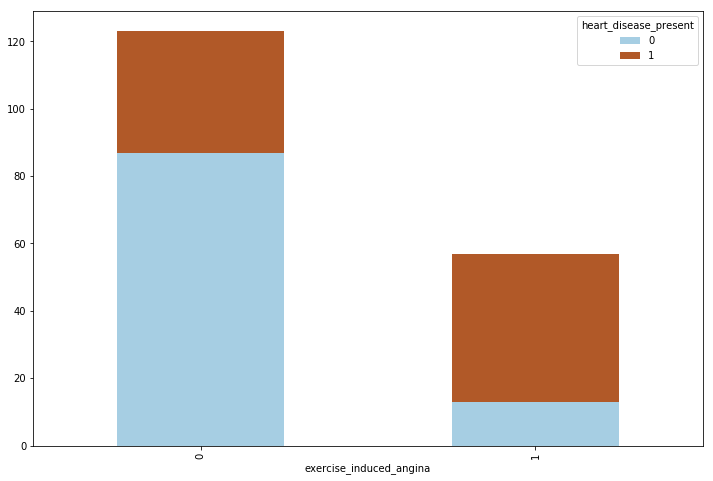

In [43]:
crosstab = pd.crosstab(index=train_df.exercise_induced_angina, columns=train_df.heart_disease_present)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

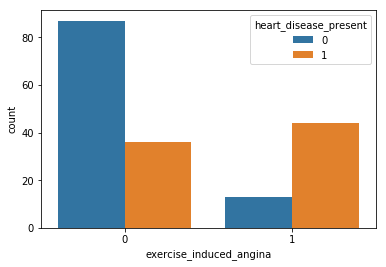

In [44]:
sns.countplot(train_df.exercise_induced_angina,hue=train_df.heart_disease_present)

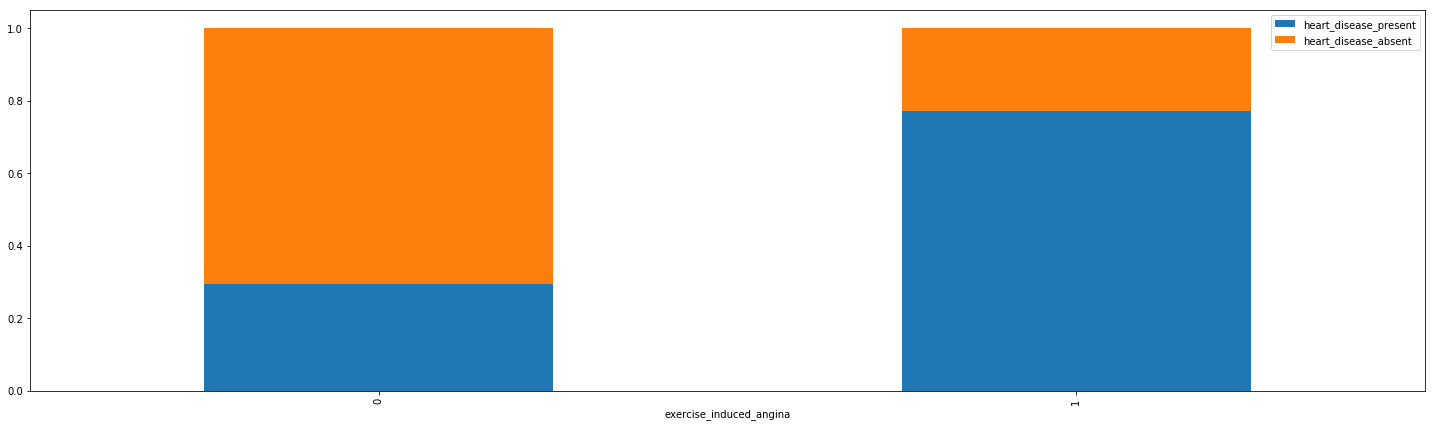

In [45]:
train_df.groupby('exercise_induced_angina').agg('mean')[['heart_disease_present','heart_disease_absent']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);

#### Note:
1. Anything that makes the heart muscle need more oxygen or reduces the amount of oxygen it receives can cause an angina attack in someone. Exercise or cold weather can cause an angina.
2. A more serious kind of angina that can lead to a heart attack.
3. The plots clearly indicate that exercise induced angina = 1 induces heart disease.

## thal

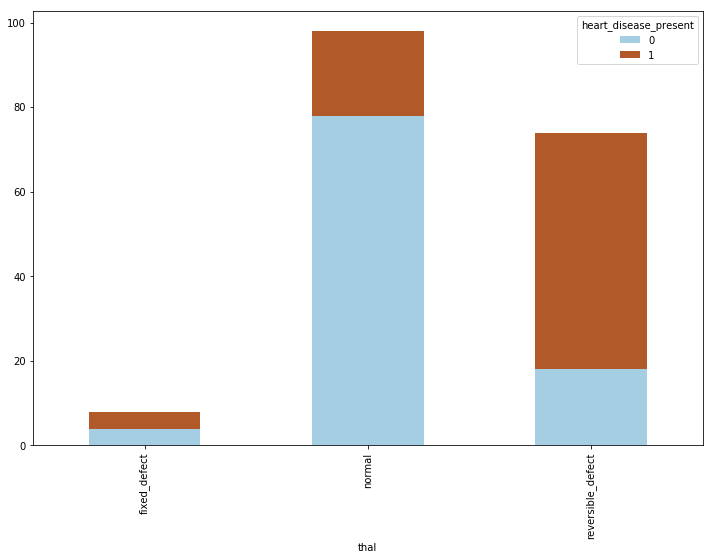

In [46]:
crosstab = pd.crosstab(index=train_df.thal, columns=train_df.heart_disease_present)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

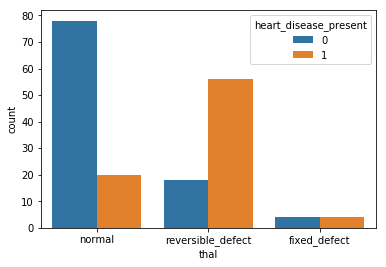

In [47]:
sns.countplot(train_df.thal,hue=train_df.heart_disease_present)

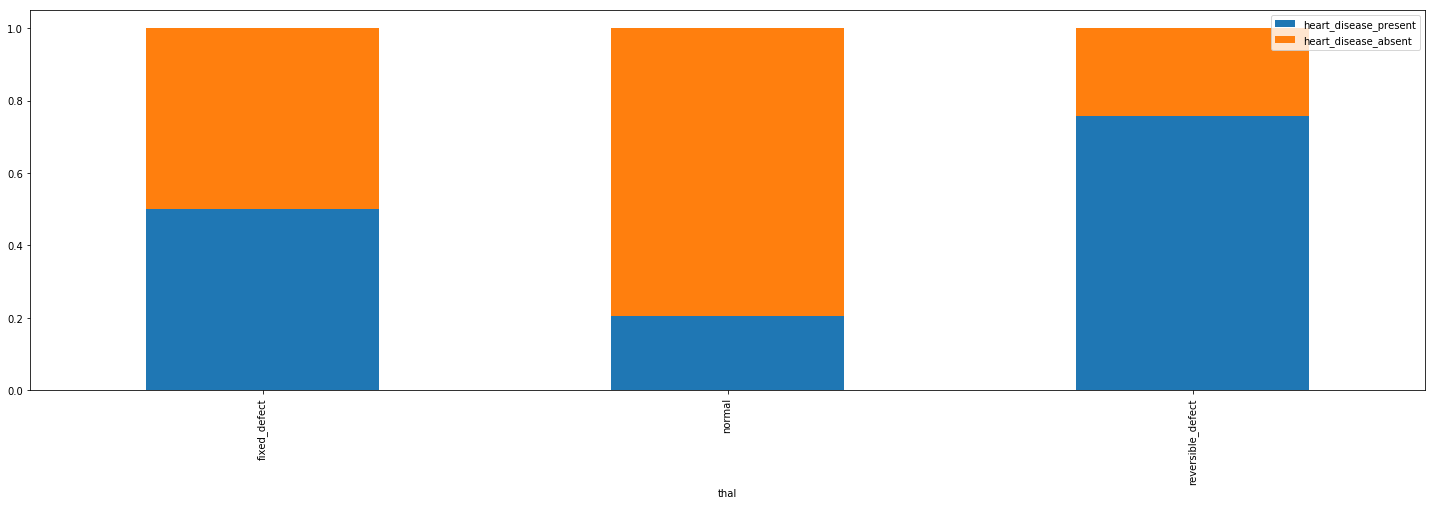

In [48]:
train_df.groupby('thal').agg('mean')[['heart_disease_present','heart_disease_absent']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);

#### Note:
1. The patients with thal values reversible and fixed detect have a greater chance of heart disease.

## Sex

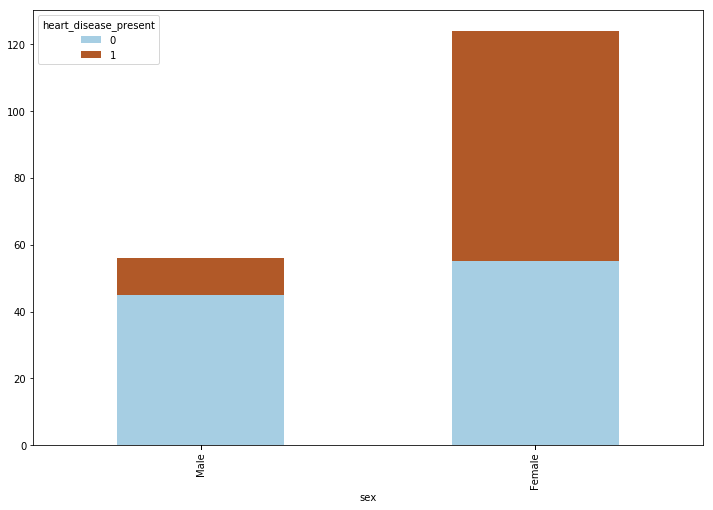

In [49]:

crosstab = pd.crosstab(index=train_df.sex, columns=train_df.heart_disease_present)
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
plt.xticks(train_df.sex,('Female','Male'))
plt.show()

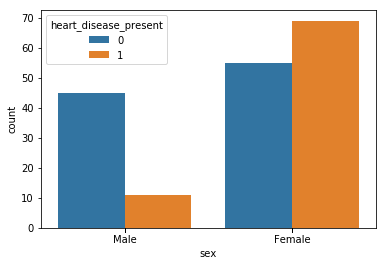

In [50]:
sns.countplot(train_df.sex,hue=train_df.heart_disease_present)
plt.xticks(train_df.sex,('Female','Male'))
plt.show()

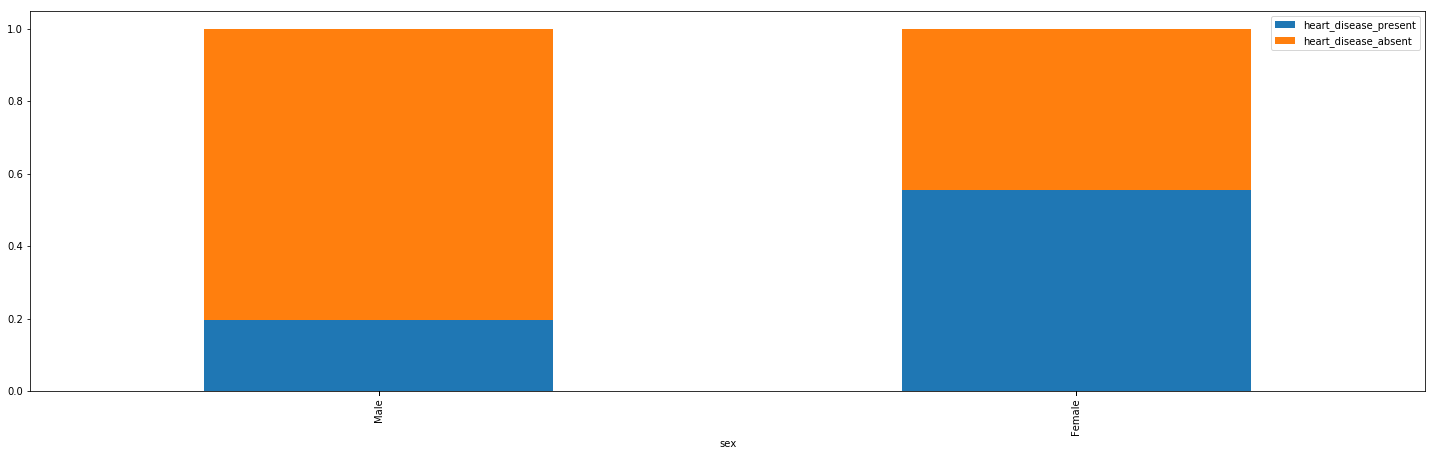

In [51]:
train_df.groupby('sex').agg('mean')[['heart_disease_present','heart_disease_absent']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);
plt.xticks(train_df.sex,('Female','Male'))
plt.show()

#### Note:
1. Females have a greater chance of having heart disease.

## Age

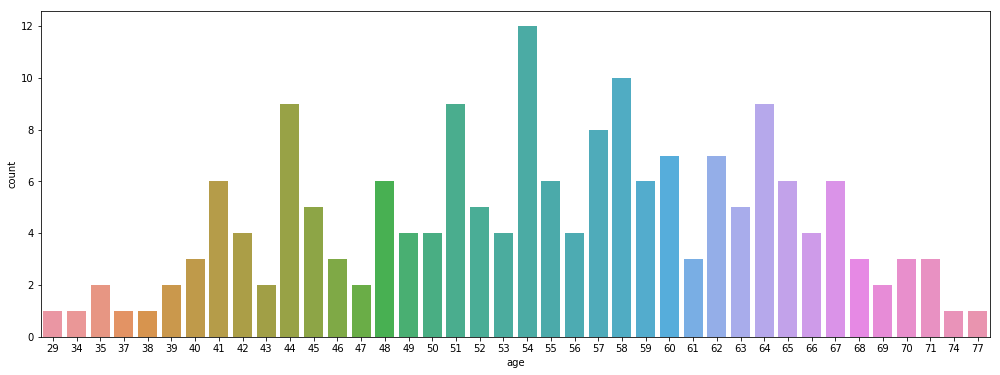

In [52]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.age)

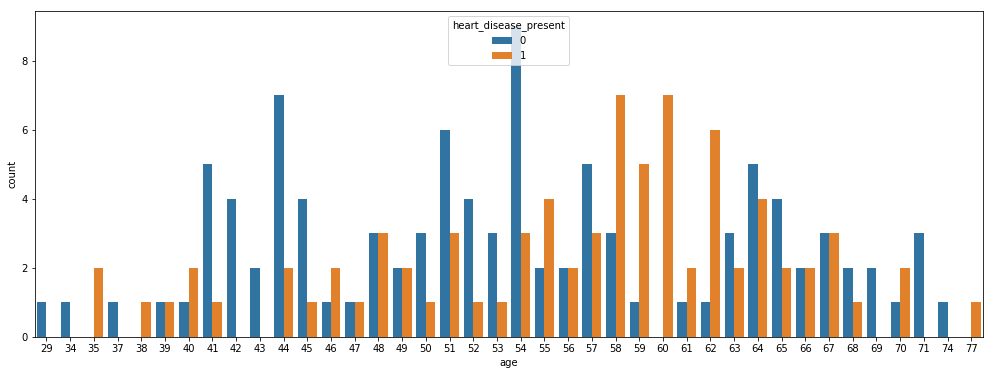

In [53]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.age, hue=train_df.heart_disease_present)

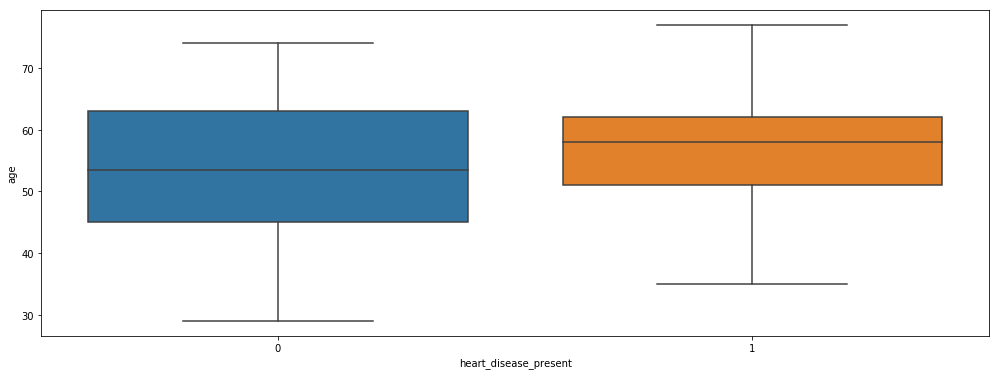

In [54]:
plt.figure(figsize=(17,6))
sns.boxplot(x = train_df.heart_disease_present,y=train_df.age)
plt.show()

#### Note:
1. The presence of heart disease is quite evident in older patients.
2. The youngest heart disease patient is 35 years old.
3. Half of the heart disease patients are from 59 to 75 yrs.

## resting_blood_pressure

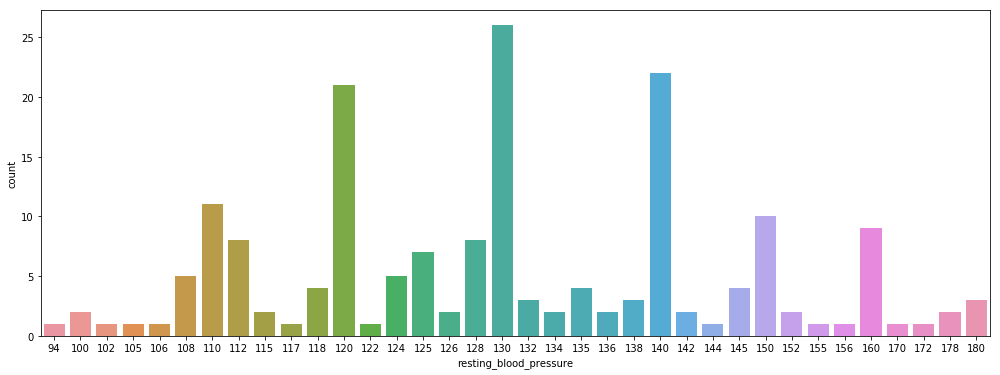

In [55]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.resting_blood_pressure)

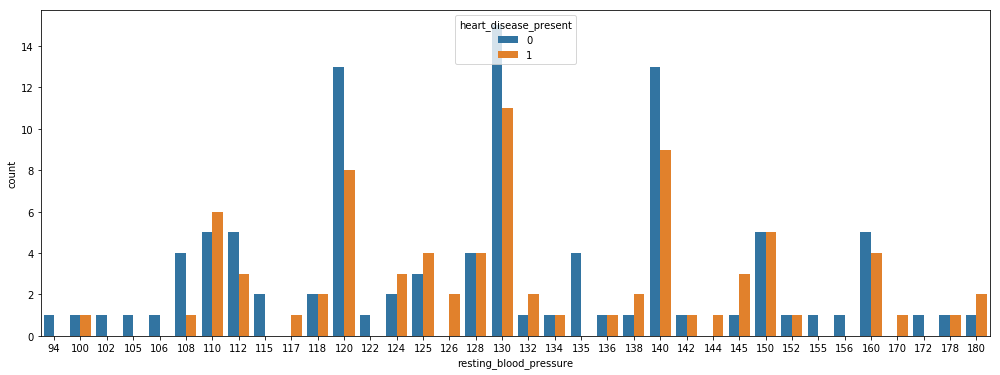

In [56]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.resting_blood_pressure, hue=train_df.heart_disease_present)

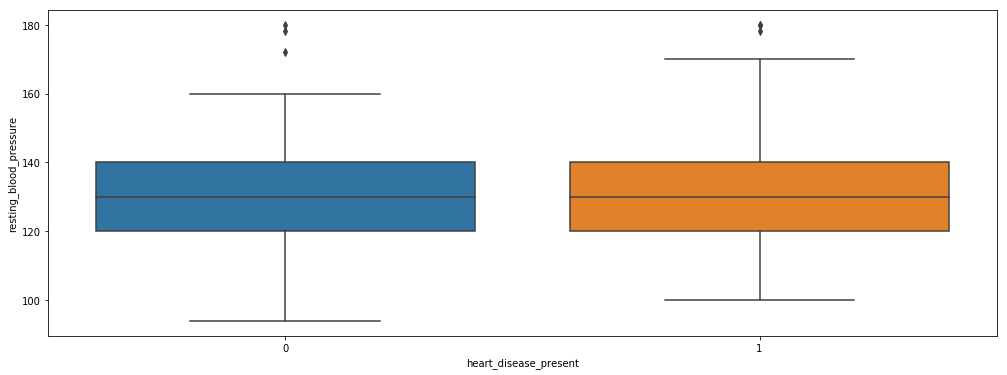

In [57]:
plt.figure(figsize=(17,6))
sns.boxplot(x = train_df.heart_disease_present,y=train_df.resting_blood_pressure)
plt.show()

#### Note:
1. There is not much difference between the patients having heart disease and not with respect to the resting blood sugar.

## max_heart_rate_achieved

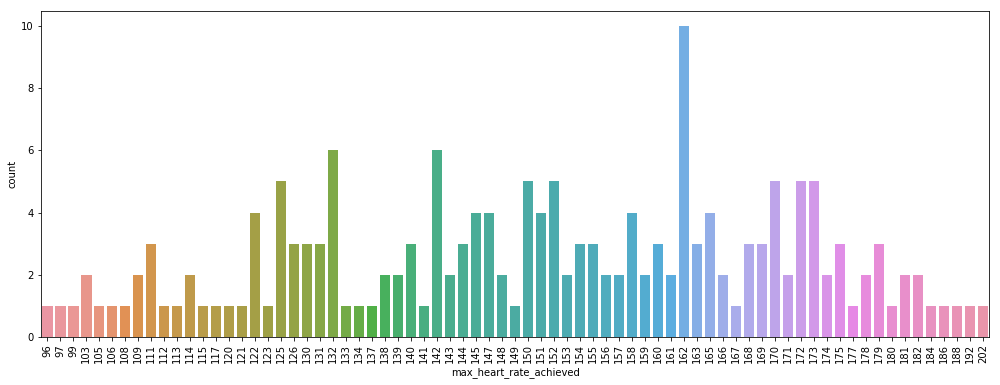

In [58]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.max_heart_rate_achieved)
plt.xticks(rotation=90)
plt.show()

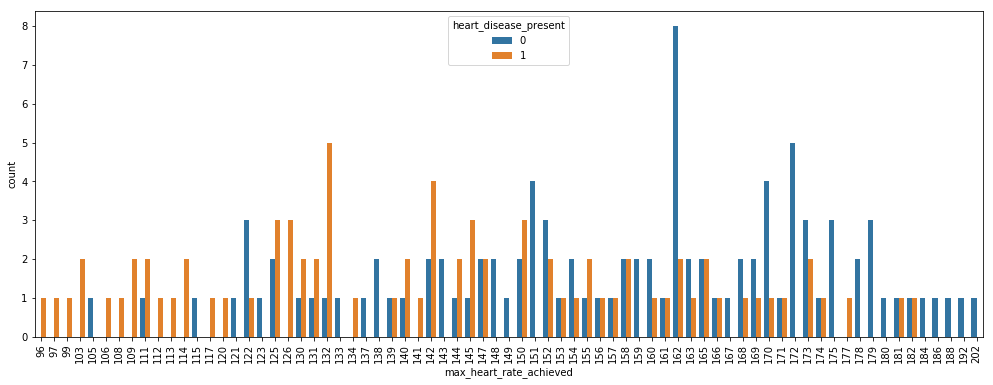

In [59]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.max_heart_rate_achieved, hue=train_df.heart_disease_present)
plt.xticks(rotation=90)
plt.show()

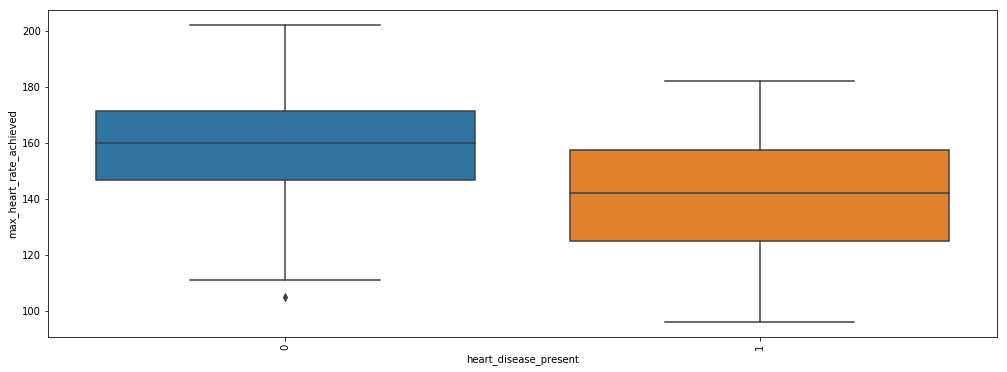

In [60]:
plt.figure(figsize=(17,6))
sns.boxplot(x = train_df.heart_disease_present,y=train_df.max_heart_rate_achieved)
plt.xticks(rotation=90)
plt.show()

#### Note:
1. There is a lower chance of having heart disease if the max heart rate achieved is higher.
2. Half of the heart disease patients have a reached a max heart rate of between 90 and 140.
3. So a slowing heart rate is undesirable

## serum_cholesterol_mg_per_dl

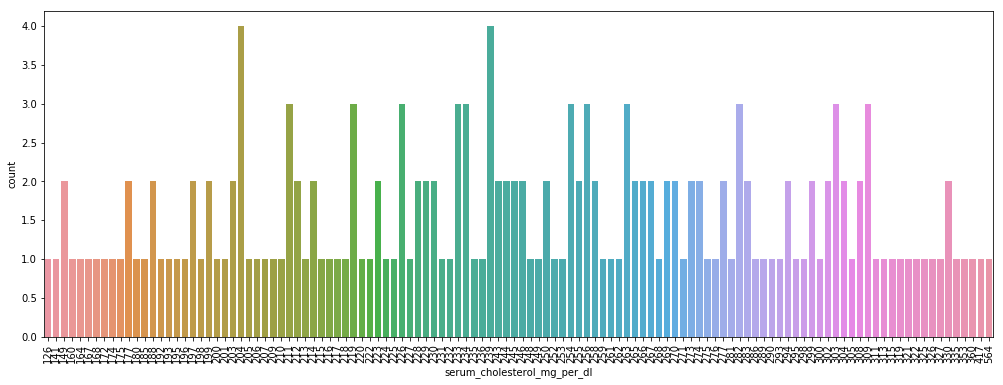

In [61]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.serum_cholesterol_mg_per_dl)
plt.xticks(rotation=90)
plt.show()

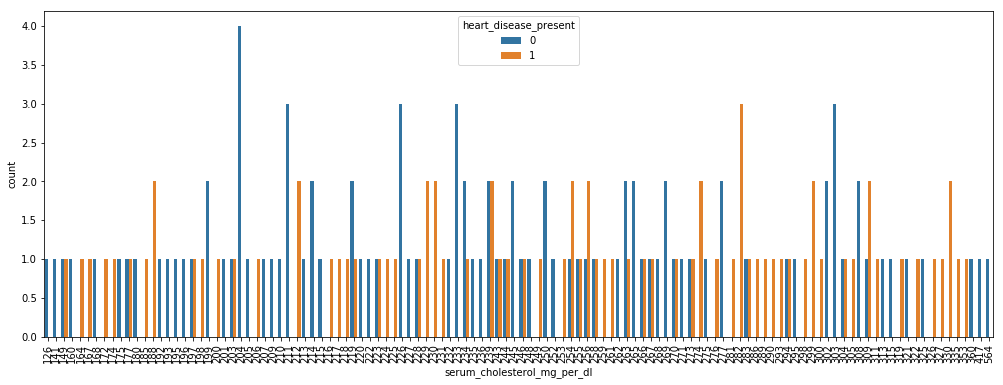

In [62]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.serum_cholesterol_mg_per_dl, hue=train_df.heart_disease_present)
plt.xticks(rotation=90)
plt.show()

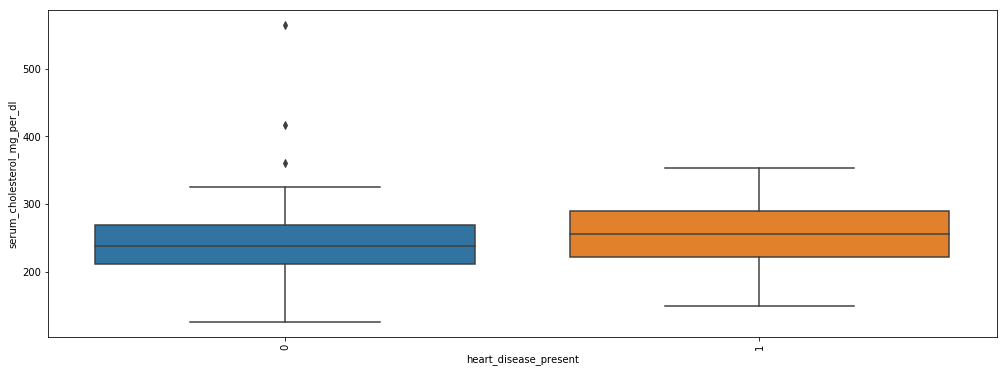

In [63]:
plt.figure(figsize=(17,6))
sns.boxplot(x = train_df.heart_disease_present,y=train_df.serum_cholesterol_mg_per_dl)
plt.xticks(rotation=90)
plt.show()

#### Note:
1. Patient with higher cholesterol levels having a higher chance of heart disease.

## oldpeak_eq_st_depression

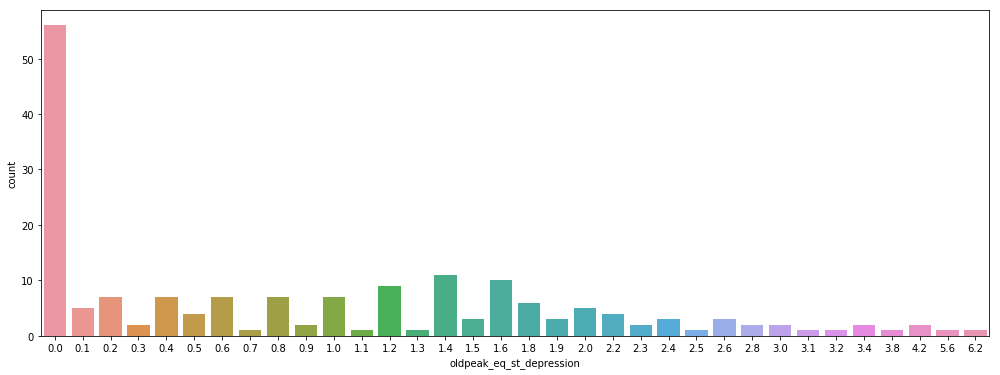

In [64]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.oldpeak_eq_st_depression)
plt.show()

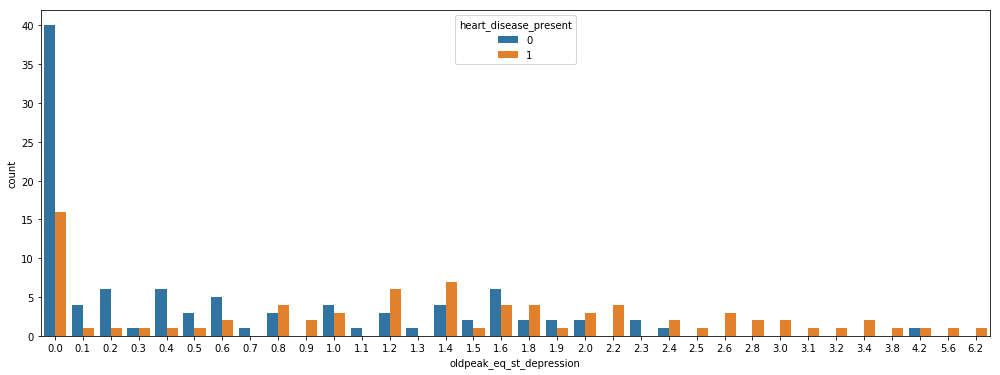

In [65]:
plt.figure(figsize=(17,6))
sns.countplot(train_df.oldpeak_eq_st_depression, hue=train_df.heart_disease_present)
plt.show()

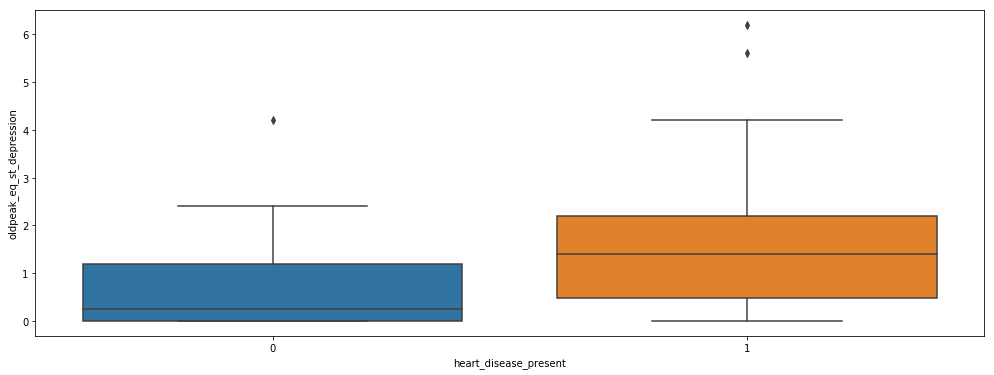

In [66]:
plt.figure(figsize=(17,6))
sns.boxplot(x = train_df.heart_disease_present,y=train_df.oldpeak_eq_st_depression)


#### Note:
1. oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms.
2. A higher value indicates a higher risk of heart disease. 


## Multivariate Analysis

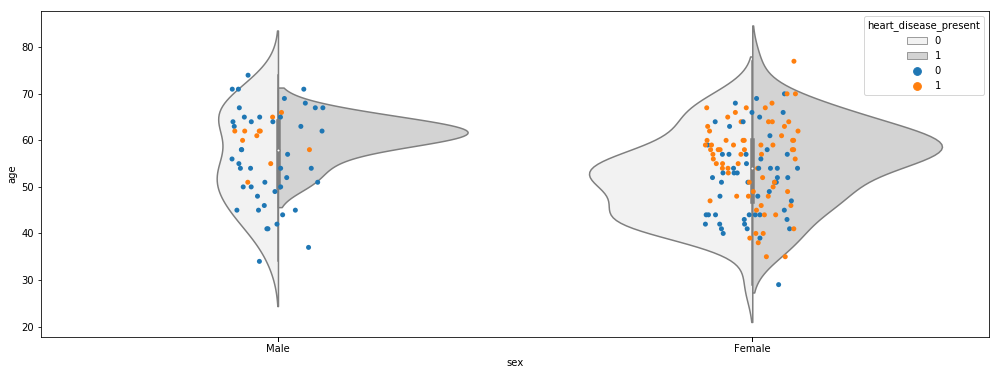

In [67]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.sex,y=train_df.age,hue=train_df.heart_disease_present,split=True,color='lightgray')
sns.stripplot(x=train_df.sex,y=train_df.age,hue=train_df.heart_disease_present,jitter=True)
plt.xticks(train_df.sex,('Female','Male'))
plt.show()

#### Note:
1. Females have a higher chance of getting heart disease. 
2. Also heart disease is present in females from an of 35 yrs onwards. Males on the other hand have heart disease who are above 50 yrs.


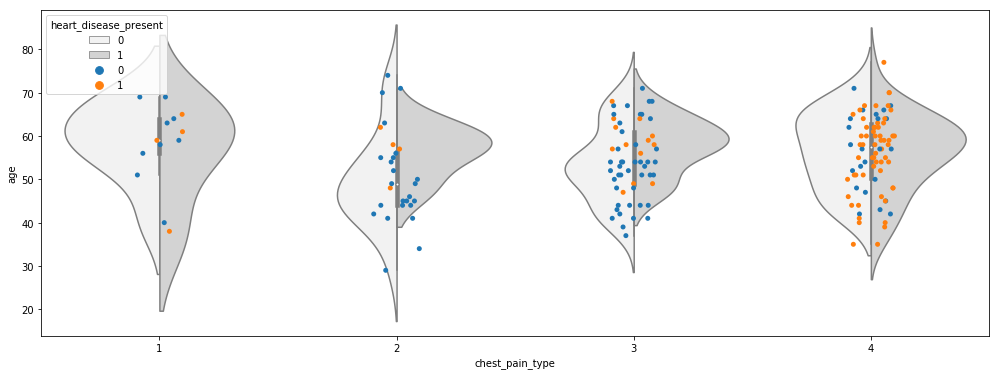

In [68]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.chest_pain_type,y=train_df.age,hue=train_df.heart_disease_present,split=True,color='lightgray')
sns.stripplot(x=train_df.chest_pain_type,y=train_df.age,hue=train_df.heart_disease_present,jitter=True)
plt.show()
#plt.xticks(train_df.sex,('Female','Male'))

#### Note:
1. Patients with chest pain type 4 have a greater chance of heart disease.
2. It is observed that patients with chest pain type 2 and 3 have a greater chance of heart disease at an older age.
3. The surprising part is with patients having chest pain type 1 have a greater chance of heart disease at an younger age.
It could be that a combination of chest pain with other factorsmay be responsible for the presence of heart disease.
4. This shows that any chest pain cannot be ignored.


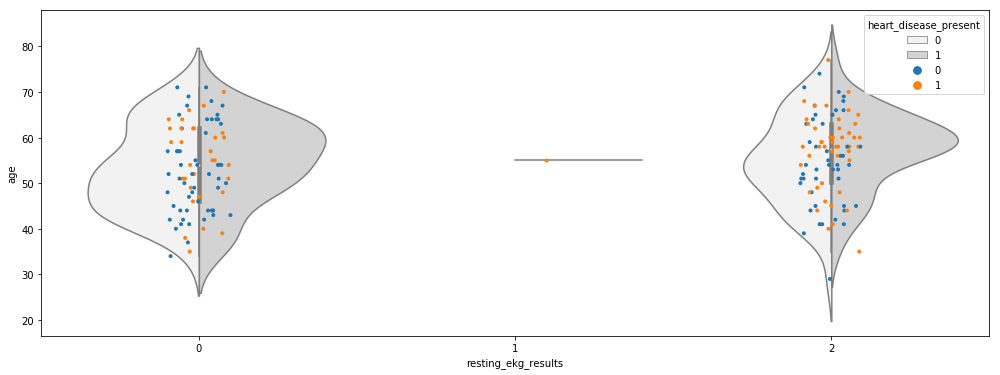

In [69]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.resting_ekg_results,y=train_df.age,hue=train_df.heart_disease_present,split=True,color='lightgray')
sns.stripplot(x=train_df.resting_ekg_results,y=train_df.age,hue=train_df.heart_disease_present,jitter=True,size=4)
plt.show()

#### Note:
1. Previously seen 100% of heart patients with resting ekg results have heart disease but this is because only 1 patient ahs it.
2. It can be concluded that resting_ekg_results 0>1>2 have heart disease.
3. Age plays an important role when resting_ekg_results is 2.Older the person greater the chances of having heart disease.

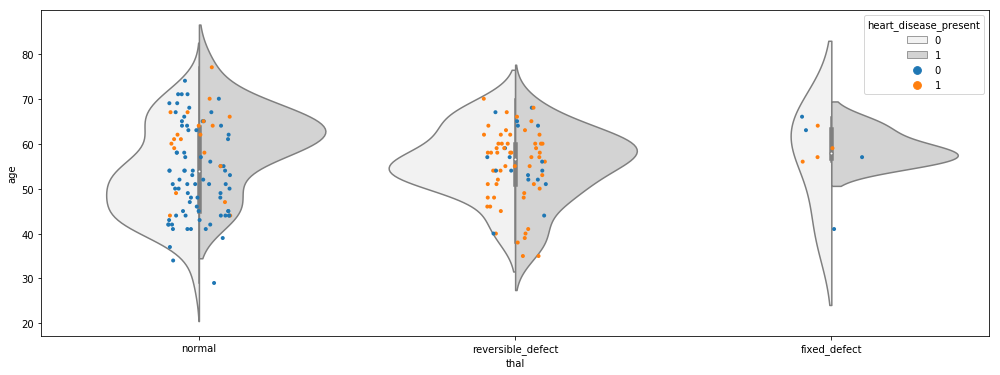

In [70]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.thal,y=train_df.age,hue=train_df.heart_disease_present,split=True,color='lightgray')
sns.stripplot(x=train_df.thal,y=train_df.age,hue=train_df.heart_disease_present,jitter=True,size=4)
plt.show()

#### Note:
1. Patients with reversible defect thal have a higher risk of heart disease. The age however in this case isn't a contributing factor.
2. However for patients with normal thal have a lower risk of heart disease but older the person higher the chance.The same is the case for fixed defect thal

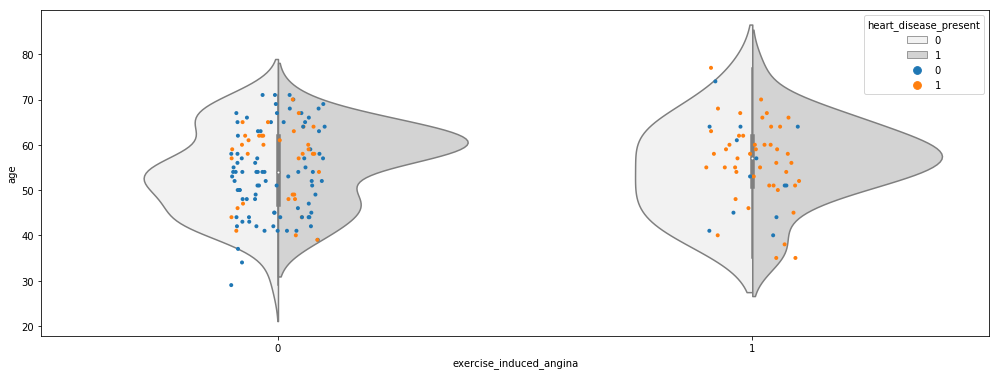

In [71]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.exercise_induced_angina,y=train_df.age,hue=train_df.heart_disease_present,split=True,color='lightgray')
sns.stripplot(x=train_df.exercise_induced_angina,y=train_df.age,hue=train_df.heart_disease_present,jitter=True,size=4)
plt.show()

#### Note:
1. Patients with exercise induced angina thal have a higher risk of heart disease. The age however in this case isn't a contributing factor.

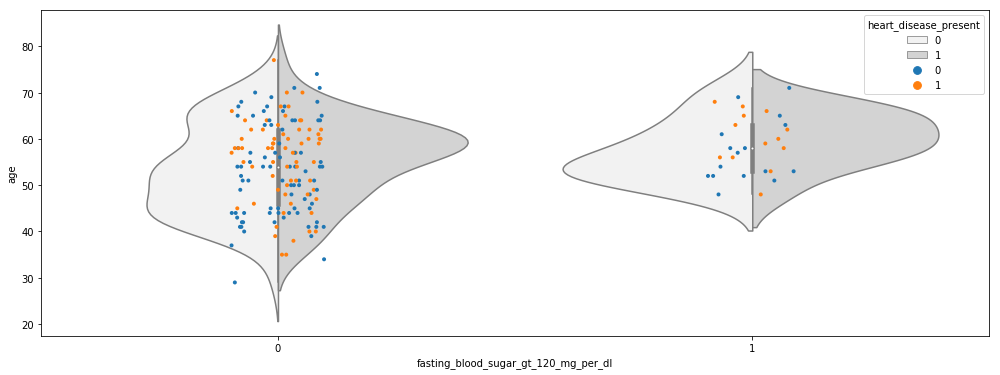

In [72]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.fasting_blood_sugar_gt_120_mg_per_dl,y=train_df.age,hue=train_df.heart_disease_present,split=True,color='lightgray')
sns.stripplot(x=train_df.fasting_blood_sugar_gt_120_mg_per_dl,y=train_df.age,hue=train_df.heart_disease_present,jitter=True,size=4)
plt.show()

#### Note:
1. Patients with fasting blood sugar gt 120 mg per dl have a lower risk of heart disease. It is also observed that fasting blood sugar gt 120 mg per dl = 1 at an older age. 
2. Patients older than 50 have a higher risk irrespective of fasting blood sugar gt 120 mg per dl.

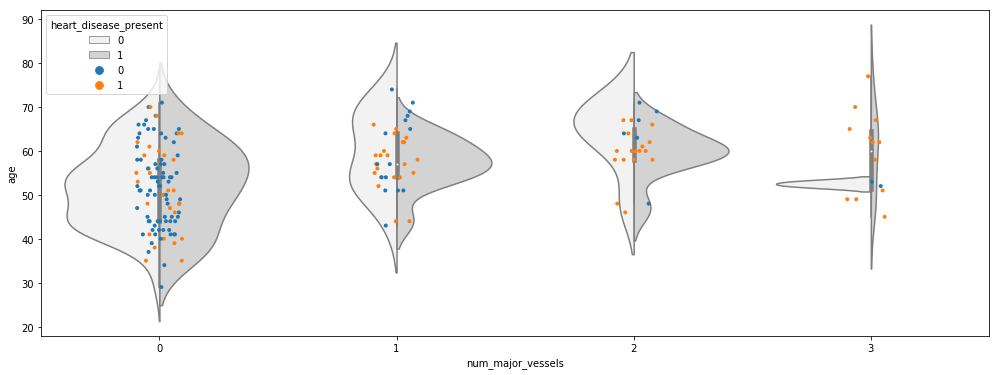

In [73]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.num_major_vessels,y=train_df.age,hue=train_df.heart_disease_present,split=True,color='lightgray')
sns.stripplot(x=train_df.num_major_vessels,y=train_df.age,hue=train_df.heart_disease_present,jitter=True,size=4)
plt.show()

#### Note:
1. Patients with a higher number of major blood vessels blocked have a higher risk of heart disease. The age however in this case isn't a contributing factor.
2. Patients with a no major blood vessels blocked can get heart disease at a lower age.

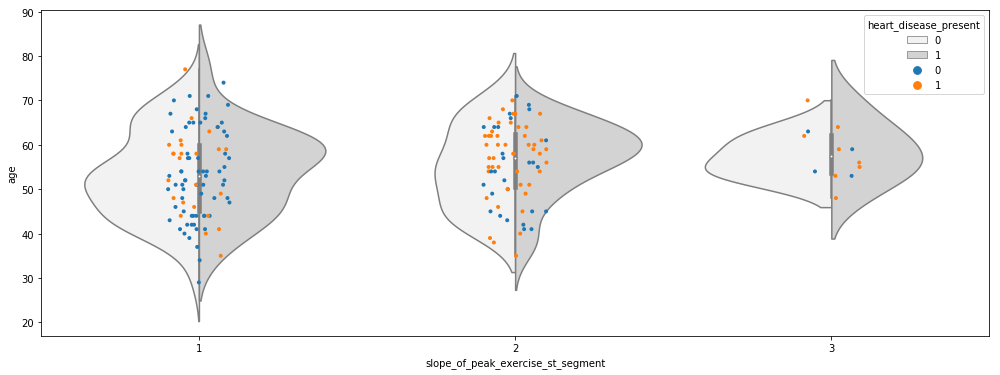

In [74]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.slope_of_peak_exercise_st_segment,y=train_df.age,hue=train_df.heart_disease_present,split=True,color='lightgray')
sns.stripplot(x=train_df.slope_of_peak_exercise_st_segment,y=train_df.age,hue=train_df.heart_disease_present,jitter=True,size=4)
plt.show()

#### Note:
1. Maximum patients have slope of peak exercise st segment=2.
2. As slope of peak exercise st segment increases from 1 to 3, higher is the chance of getting heart disease. 

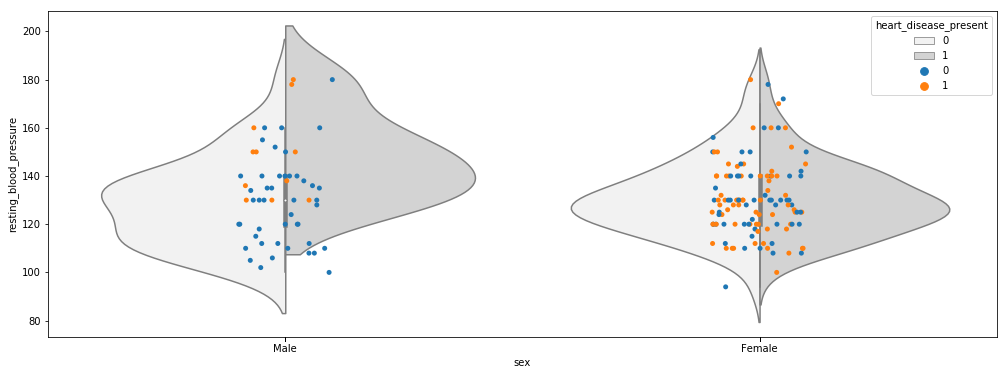

In [75]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.sex,y=train_df.resting_blood_pressure,hue=train_df.heart_disease_present,split=True,color='lightgray')
sns.stripplot(x=train_df.sex,y=train_df.resting_blood_pressure,hue=train_df.heart_disease_present,jitter=True)
plt.xticks(train_df.sex,('Female','Male'))
plt.show()

#### Note:
1. Females have a greater chance of getting heart disease.
2. Males who have heart disease have a resting blood pressure of 140 and more. For females the same cannot be said.

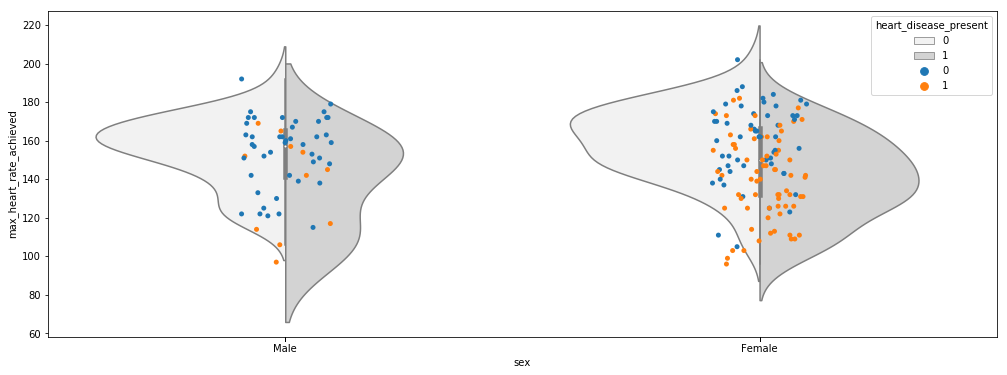

In [76]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.sex,y=train_df.max_heart_rate_achieved,hue=train_df.heart_disease_present,split=True,color='lightgray')
sns.stripplot(x=train_df.sex,y=train_df.max_heart_rate_achieved,hue=train_df.heart_disease_present,jitter=True)
plt.xticks(train_df.sex,('Female','Male'))
plt.show()

#### Note:
1. Females have a greater chance of getting heart disease.
2. Males who have heart disease have a max heart rate achieved of a lower value. For females the same cannot be said.

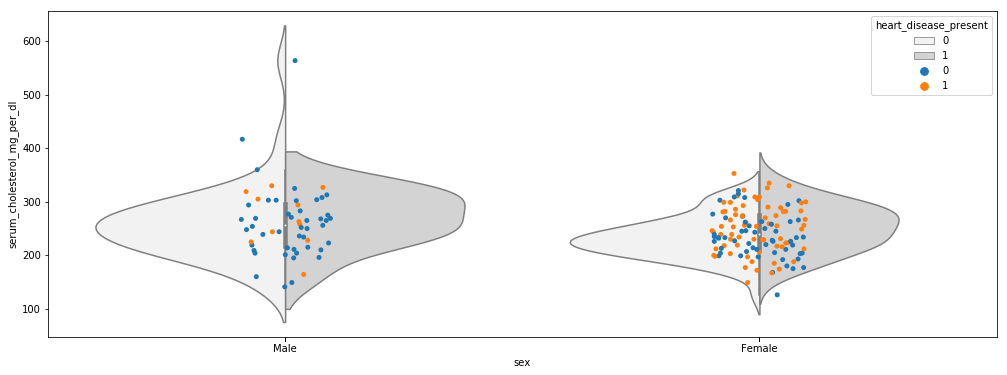

In [77]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.sex,y=train_df.serum_cholesterol_mg_per_dl,hue=train_df.heart_disease_present,split=True,color='lightgray')
sns.stripplot(x=train_df.sex,y=train_df.serum_cholesterol_mg_per_dl,hue=train_df.heart_disease_present,jitter=True)
plt.xticks(train_df.sex,('Female','Male'))
plt.show()

#### Note:
1. Females have a greater chance of getting heart disease.
2. Cholesterol of any value above 150 can result in heart disease irrespective of males or females.

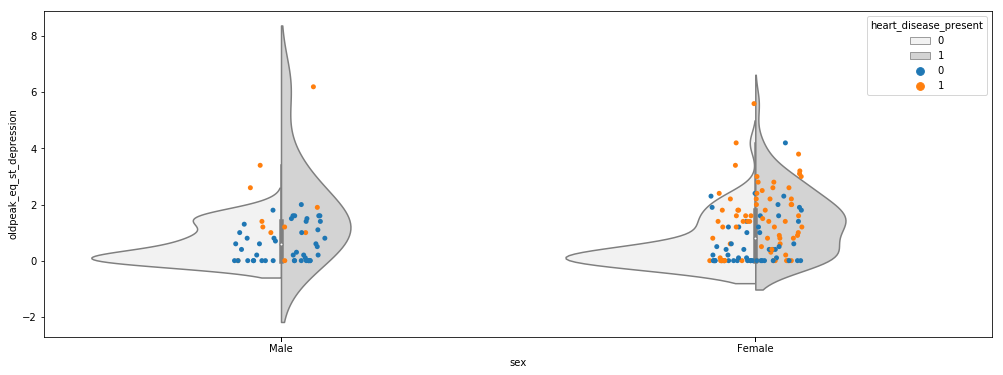

In [78]:
plt.figure(figsize=(17,6))
sns.violinplot(x=train_df.sex,y=train_df.oldpeak_eq_st_depression,hue=train_df.heart_disease_present,split=True,color='lightgray')
sns.stripplot(x=train_df.sex,y=train_df.oldpeak_eq_st_depression,hue=train_df.heart_disease_present,jitter=True)
plt.xticks(train_df.sex,('Female','Male'))
plt.show()

#### Note:
1. Females have a greater chance of getting heart disease.
2. For fales who have heart disease the oldpeak eq st depression have values between -1 and 6.While for males it is between -2 and 8.

### Summary:
1. Females have a higher chance of getting heart disease.
2. Older the patient is, the greater is the chance of getting heart disease.
3. Chest pain of any type can result in heart disease so should not be ignored.
4. Heart disease due to exercise induced angina is greater for females than for females.
5. Males who have heart disease have a max heart rate achieved of a lower value. For females the same cannot be said.
6. Patients with reversible defect thal have a higher risk of heart disease. The age however in this case isn't a contributing factor. However for patients with normal thal have a lower risk of heart disease but older the person higher the chance.The same is the case for fixed defect thal.
7. Males who have heart disease have a resting blood pressure of 140 and more. For females the same cannot be said.
8. Cholesterol of any value above 150 can result in heart disease irrespective of males or females.

In [79]:
train_df.to_csv('train_modified_dataset_ver1.csv')